In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
import re

In [111]:
counseling = pd.read_excel('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\data for analysis\\Haravot_Barzel\\counseling_centers.xlsx')
counseling = counseling.copy()

hospitals = pd.read_excel('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\data for analysis\\Haravot_Barzel\\hospitals_psyc.xlsx')
hospitals = hospitals.copy()

casualties = pd.read_excel('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\data for analysis\\Haravot_Barzel\\casualties.xlsx')
casualties = casualties.copy()

---

### counseling

#### Counseling centers for families of mentally injured people [link to the data source](https://data.gov.il/dataset/mtl-families-centers/resource/cef1c51a-452f-484d-8834-6bd77f696ad8)

In [70]:
replace_dict = {
    "בית חנינא": "ירושלים",
    'גבעת שאול ': "ירושלים",
    "קריית ספר": "מודיעין-מכבים-רעות",
    "פתח תקוה " : 'פתח תקוה'
}

counseling['mtl_families_center_city'] = counseling['mtl_families_center_city'].replace(replace_dict)

In [64]:
counseling['mtl_families_center_city'].unique()

array(['ירושלים', 'בית שמש', 'ביתר עלית', 'אשדוד', 'אשקלון', 'קרית מלאכי',
       'נתיבות', 'קרית גת', 'חדרה', 'נתניה', 'כפר סבא', 'פתח תקוה',
       'ראשון לציון', 'תל אביב', 'בני ברק', 'מודיעין-מכבים-רעות', 'רמלה',
       'כרמיאל', 'חיפה', 'נצרת עילית', 'אור עקיבא', "באקה אלג'רביה",
       'כפר קרע', 'קרית שמונה', 'עפולה', 'קרית ים', 'באר שבע', 'בת ים',
       'רמת גן', 'באר יעקב', 'הוד השרון', 'צור משה', 'עכו', 'עמק חפר'],
      dtype=object)

In [65]:
counseling.shape

(39, 6)

In [66]:
counseling.head()

,mtl_families_center_type,סוגי מרכזי ייעוץ,mtl_families_center_name,mtl_families_center_address,mtl_families_center_city,mtl_families_center_phone
0,2,מרכזי יעוץ למשפחות בקהילה,מילם ירושלים,"שד' הרצל 124,קומה ג, יד שרה",ירושלים,02-6522147
1,2,מרכזי יעוץ למשפחות בקהילה,מרכז יעוץ למשפחות ירושלים,בית הדפוס 11,ירושלים,073-3952205
2,2,מרכזי יעוץ למשפחות בקהילה,האדי מרכז יעוץ למשפחות בית חנינא,אל נחיל בית חנינא,ירושלים,02-5834944
3,2,מרכזי יעוץ למשפחות בקהילה,האדי מרכז יעוץ למשפחות בית שמש,שפת אמת 27,בית שמש,073-3952205
4,2,מרכזי יעוץ למשפחות בקהילה,האדי מרכז יעוץ למשפחות ביתר עלית,סלונים 1,ביתר עלית,073-3952205


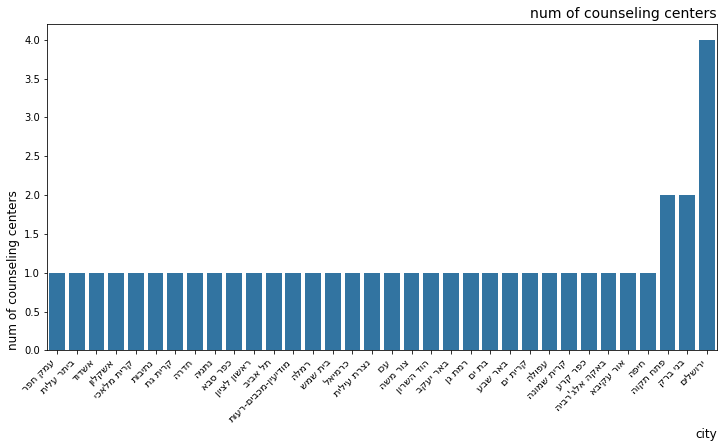

In [67]:
# Reshape and reverse text direction for Hebrew
counseling['mtl_families_center_city'] = counseling['mtl_families_center_city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Plot the count of rows for each value in the 'mtl_families_center_city' column
plt.figure(figsize=(12, 6))
sns.countplot(data=counseling, x='mtl_families_center_city', order=counseling['mtl_families_center_city'].value_counts().index)

# Set the title and labels with right-to-left text direction
plt.title(get_display(arabic_reshaper.reshape('num of counseling centers')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('city')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('num of counseling centers')), fontsize=12, loc='bottom')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_xaxis()
plt.show()

#### the cities with the most mental health centers are **Jerusalem, followed by Bnei Brak and Petah Tikva.**

In [71]:
def map_to_district(city):
    mapping = {
        "הוד השרון": "פתח תקוה",
        "כפר סבא": "פתח תקוה",
        "בני ברק": "רמת גן",
        "כפר קרע": "חדרה",
        "באקה אלג'רביה": "חדרה",
        "אור עקיבא": "חדרה",
        "בת ים": "חולון",
        "באר יעקב": "רמלה",
        "עפולה": "יזרעאל",
        "קרית מלאכי": "אשקלון",
        "קרית גת": "אשקלון",
        "צור משה": "השרון",
        "נתניה": "השרון",
        "עמק חפר": "השרון",
        "קרית ים": "חיפה",
        "ביתר עלית": "ירושלים",
        "בית שמש": "ירושלים"
    }
    return mapping.get(city, city)

grouped = counseling.groupby('mtl_families_center_city')['mtl_families_center_name'].apply(list).reset_index()
grouped['centers_num'] = grouped['mtl_families_center_name'].apply(len)
grouped['district'] = grouped['mtl_families_center_city'].apply(map_to_district)
district_sum = grouped.groupby('district')['centers_num'].sum().reset_index()
grouped.set_index('district', inplace=True)
counseling_grouped = grouped.groupby('district')['mtl_families_center_city'].apply(list).reset_index()
counseling_grouped = counseling_grouped.merge(district_sum, on='district')
counseling_grouped.rename(columns={'mtl_families_center_city': 'city'}, inplace=True)
counseling_grouped

,district,city,centers_num
0,אשדוד,[אשדוד],1
1,אשקלון,"[אשקלון, קרית גת, קרית מלאכי]",3
2,באר שבע,[באר שבע],1
3,השרון,"[נתניה, עמק חפר, צור משה]",3
4,חדרה,"[אור עקיבא, באקה אלג'רביה, חדרה, כפר קרע]",4
5,חולון,[בת ים],1
6,חיפה,"[חיפה, קרית ים]",2
7,יזרעאל,[עפולה],1
8,ירושלים,"[בית שמש, ביתר עלית, ירושלים]",6
9,כרמיאל,[כרמיאל],1


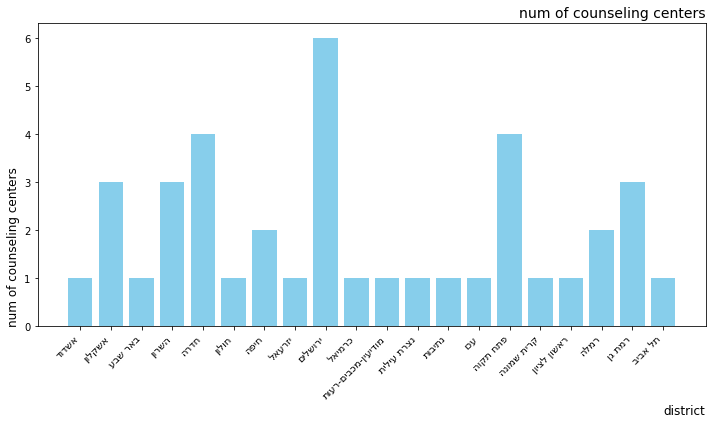

In [72]:
counseling_grouped['district'] = counseling_grouped['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(10, 6))
plt.bar(counseling_grouped['district'], counseling_grouped['centers_num'], color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('num of counseling centers')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('district')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('num of counseling centers')), fontsize=12, loc='bottom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The regions/districts with the most mental health centers are **Jerusalem, followed by Hadera and Petah Tikva.**

---

### hospitals

#### Psychiatric hospitals and psychiatric wards in general hospitals [link to the data source](https://data.gov.il/dataset/hospitals_psyc/resource/5b4dfe37-ca97-4973-9752-5f1950939832)

In [112]:
hospitals = hospitals[['hospital_name','district','city','age_description','age_code']]

In [113]:
hospitals.shape

(38, 5)

In [114]:
hospitals.tail()

,hospital_name,district,city,age_description,age_code
33,שלוותה,פתח תקווה,הוד השרון,כל הגילאים,1
34,אילנית,חדרה,פרדס חנה-כרכור,מבוגרים,2
35,הרצוג,ירושלים,ירושלים,כל הגילאים,1
36,שיקום לוינשטיין,פתח תקווה,רעננה,מבוגרים,2
37,אלין,ירושלים,ירושלים,קטינים,3


In [115]:
def clean_age_description(age_list):
    if "כל הגילאים" in age_list:
        return "כל הגילאים"
    if "מבוגרים" in age_list and "קטינים" in age_list:
        return "כל הגילאים"
    return age_list[0]

district_data = hospitals.groupby('district').agg({
    'city': list,
    'age_description': list,
    'hospital_name' : list
}).reset_index()
district_data['age_description'] = district_data['age_description'].apply(clean_age_description)
district_data['centers_num'] = district_data['city'].apply(len)

In [116]:
district_data

,district,city,age_description,hospital_name,centers_num
0,אשקלון,[אשקלון],כל הגילאים,[ברזילי],1
1,באר שבע,"[באר שבע, באר שבע]",כל הגילאים,"[סורוקה, בריאות הנפש ב""ש]",2
2,השרון,[נתניה],כל הגילאים,[לב השרון],1
3,חדרה,"[חדרה, שער מנשה, פרדס חנה-כרכור]",כל הגילאים,"[הלל יפה, שער מנשה, אילנית]",3
4,חולון,"[חולון, בת ים]",כל הגילאים,"[וולפסון, יהודה אברבנאל]",2
5,חיפה,"[חיפה, חיפה, טירת כרמל]",כל הגילאים,"[רמב""ם, בני ציון, מעלה הכרמל]",3
6,יזרעאל,[עפולה],כל הגילאים,[המרכזי בעמק],1
7,ירושלים,"[ירושלים, ירושלים, ירושלים, ירושלים, ירושלים, ...",כל הגילאים,"[הדסה עין כרם, הדסה הר הצופים, שערי צדק, מרכז ...",6
8,כנרת,[טבריה],מבוגרים,[מ.ר. צפון (פוריה)],1
9,נצרת,"[נצרת, נצרת, נצרת]",כל הגילאים,"[הסקוטי, סנט וינסנט, המשפחה הקדושה]",3


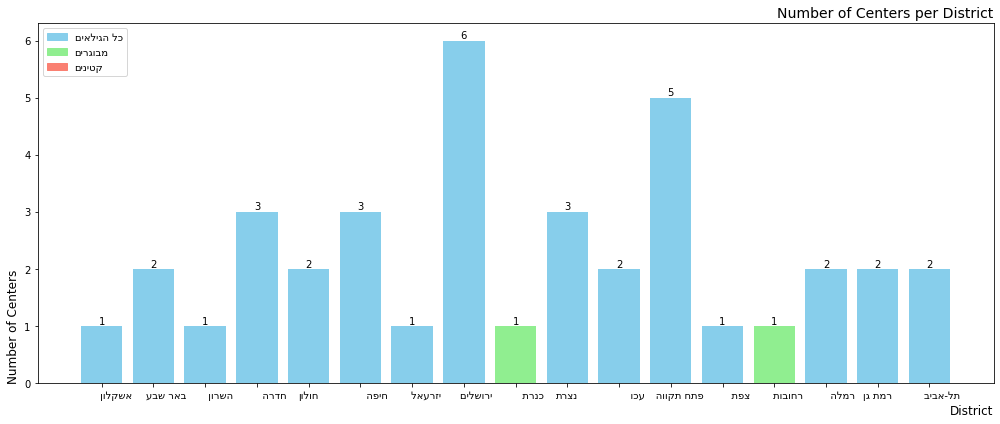

In [121]:
district_data['district_display'] = district_data['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
color_map = {'כל הגילאים': 'skyblue','מבוגרים': 'lightgreen','קטינים': 'salmon'}
plt.figure(figsize=(14, 6))
bars = plt.bar(district_data['district_display'], district_data['centers_num'], 
               color=[color_map[age_desc] for age_desc in district_data['age_description']])
plt.title(get_display(arabic_reshaper.reshape('Number of Centers per District')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('District')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('Number of Centers')), fontsize=12, loc='bottom')
for bar, num in zip(bars, district_data['centers_num']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom')
legend_labels = {get_display(arabic_reshaper.reshape(key)): value for key, value in color_map.items()}
legend_handles = [plt.Rectangle((0,0), 1, 1, color=color) for color in color_map.values()]
plt.legend(legend_handles, legend_labels, loc='upper left')
plt.tight_layout()
plt.show()

#### The districts where there are the most psychiatric departments in hospitals are **Jerusalem and then Petah Tikva.**
#### In areas such as **Kinneret and Rehovot** there is no psychiatric department for young people/minors dealing with mental problems that require hospitalization.

---

### casualties

#### Total casualties in the "Harvot Barzel" war by districts [link to the data source](https://datadashboard.health.gov.il/portal/dashboard/health)

In [124]:
casualties = casualties.iloc[1:]
casualties = casualties.iloc[:, :2]
casualties.columns = ['district', 'casualties']
casualties

,district,casualties
1,אשקלון,1240
2,לא רשום,923
3,תל אביב - יפו,799
4,ירושלים,665
5,באר שבע,458
...,...,...
220,ג'ת,קטן מ-5
221,נחף,קטן מ-5
222,סח'נין,קטן מ-5
223,טירה,קטן מ-5


<ipython-input-129-bf1ff3f1544e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')


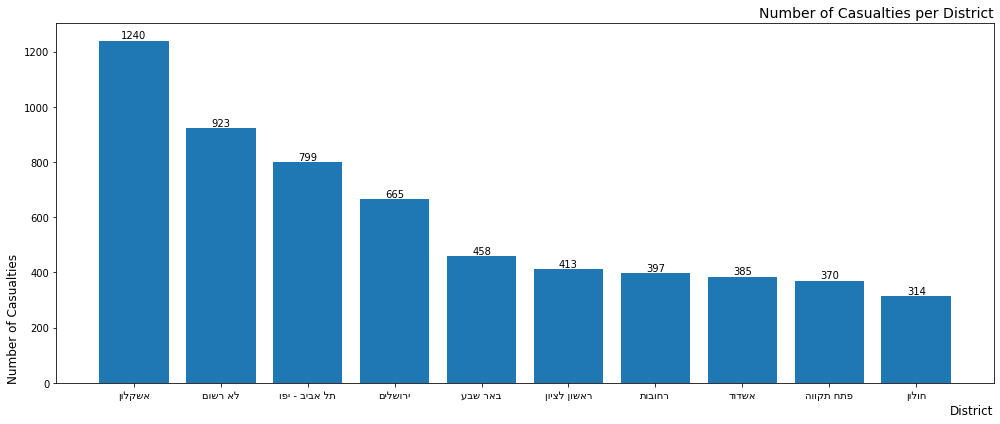

In [129]:
casualties_filtered = casualties[casualties['casualties'] != "קטן מ-5"]
casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')
casualties_filtered = casualties_filtered.dropna(subset=['casualties'])
casualties_top10 = casualties_filtered.sort_values(by='casualties', ascending=False).head(10)
casualties_top10['district_display'] = casualties_top10['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(14, 6))
bars = plt.bar(casualties_top10['district_display'], casualties_top10['casualties'])
plt.title(get_display(arabic_reshaper.reshape('Number of Casualties per District')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('District')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('Number of Casualties')), fontsize=12, loc='bottom')
for bar, num in zip(bars, casualties_top10['casualties']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom')
plt.tight_layout()
plt.show()

<ipython-input-130-c352877f1a73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')


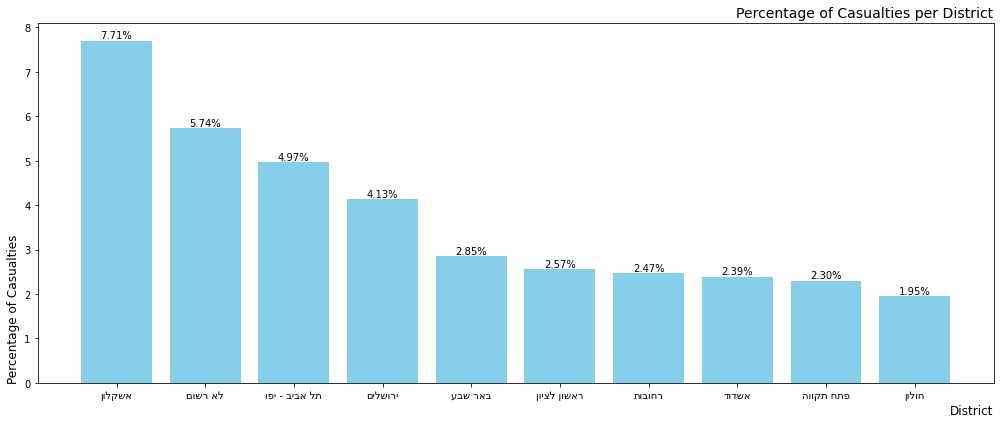

In [130]:
casualties_filtered = casualties[casualties['casualties'] != "קטן מ-5"]
casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')
casualties_filtered = casualties_filtered.dropna(subset=['casualties'])
total_casualties = casualties_filtered['casualties'].sum()
casualties_filtered['casualties_percentage'] = (casualties_filtered['casualties'] / total_casualties) * 100
casualties_top10 = casualties_filtered.sort_values(by='casualties_percentage', ascending=False).head(10)
casualties_top10['district_display'] = casualties_top10['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(14, 6))
bars = plt.bar(casualties_top10['district_display'], casualties_top10['casualties_percentage'], color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('Percentage of Casualties per District')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('District')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('Percentage of Casualties')), fontsize=12, loc='bottom')
for bar, num in zip(bars, casualties_top10['casualties_percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{num:.2f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

<ipython-input-133-bd618e522c5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')
<ipython-input-133-bd618e522c5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casualties_exceeding_1percent['district_display'] = casualties_exceeding_1percent['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))


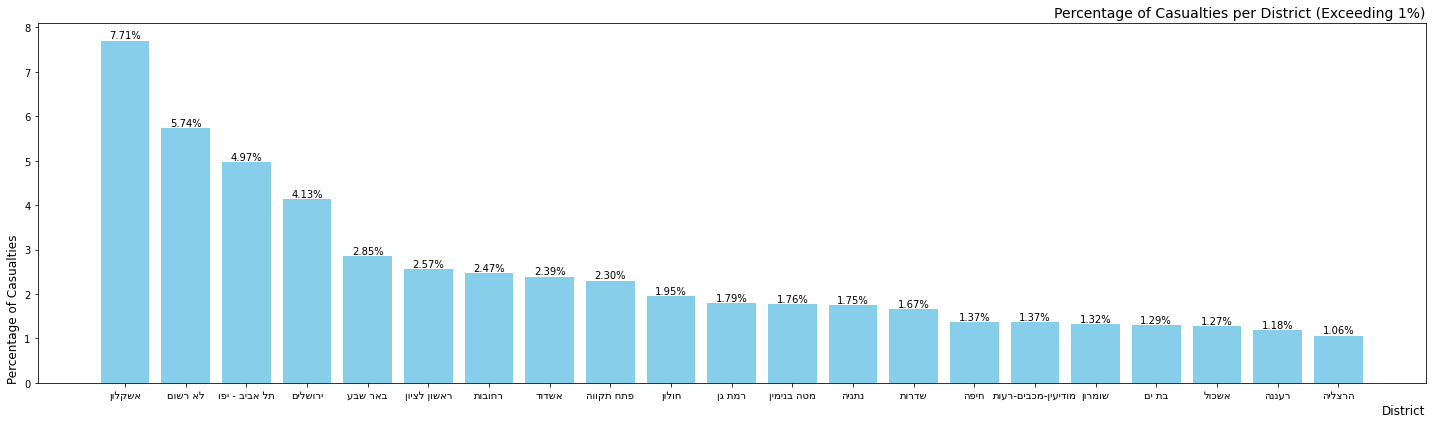

In [133]:
casualties_filtered = casualties[casualties['casualties'] != "קטן מ-5"]
casualties_filtered['casualties'] = pd.to_numeric(casualties_filtered['casualties'], errors='coerce')
casualties_filtered = casualties_filtered.dropna(subset=['casualties'])
total_casualties = casualties_filtered['casualties'].sum()
casualties_filtered['casualties_percentage'] = (casualties_filtered['casualties'] / total_casualties) * 100
casualties_exceeding_1percent = casualties_filtered[casualties_filtered['casualties_percentage'] > 1]
casualties_exceeding_1percent['district_display'] = casualties_exceeding_1percent['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(20, 6))
bars = plt.bar(casualties_exceeding_1percent['district_display'], casualties_exceeding_1percent['casualties_percentage'], color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('Percentage of Casualties per District (Exceeding 1%)')), fontsize=14, loc='right')
plt.xlabel(get_display(arabic_reshaper.reshape('District')), fontsize=12, loc='right')
plt.ylabel(get_display(arabic_reshaper.reshape('Percentage of Casualties')), fontsize=12, loc='bottom')
for bar, num in zip(bars, casualties_exceeding_1percent['casualties_percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{num:.2f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### It can be seen from the data **that most of the victims come from the Ashkelon area.**

---
> # Conclusions :
> #### It can be seen that in terms of resources for the treatment of mentally injured and psychiatric patients **Jerusalem and Petah Tikva districts offer the most response** (both in terms of hospitals and psychiatric departments and in terms of social care centers). **On the other hand, it can be seen that the Ashkelon district is the district with the most casualties since the beginning of the war.** If we also refer to Ashdod and the other settlements around Ashkelon, we can say that **In comparison to the actual number of victims, the Ashkelon district has the greatest demand for social service and psychiatric treatment facilities.**
---


---
> # Recommendations :
> #### Based on the assumption that a physical casualty has a psychological evaluation and is given a choice for psychological therapy and assistance, the data analysis is based on general casualty data. To further delve into the conclusion, I plan to gather information on the number of hospitalized wards in each center as well as the percentage of mental casualties from the conflict compared to total casualties. This will allow me to accurately assess the significance and depth of the results.
> #### We can also say that in the Sea of Galilee and Tiberias there is no response to the need for mental and psychiatric treatment centers for minors and children (the closest center is in Zefat). In the future, when the evacuated residents of the north return, the disadvantage in these centers will be felt even more, and therefore emphasis must be given to a more in-depth study of the demand for centers of this type or suitable alternatives in the north and especially in the Kinneret district.
---
